In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv('./Sales_Data/Sales_April_2019.csv')  #method to read single csv

In [3]:
import os

In [4]:
files = [file for file in os.listdir('./Sales_Data')]     #read all the csv in one step

In [5]:
all_months_data = pd.DataFrame()                           #creating dataframe of all the csv files

for file in files:
    df = pd.read_csv('./Sales_Data/'+file)
    all_months_data = pd.concat([all_months_data, df])

In [6]:
len(all_months_data)

186850

In [6]:
all_months_data.to_csv('all_data.csv', index=False)                #write a csv of all months data 

In [7]:
#read_all_data

In [8]:
all_data = pd.read_csv('all_data.csv')

In [9]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [10]:
#Best Month for Sales and Money earned
all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [11]:
all_data['Date'] = all_data['Order Date'].str[:8] 

In [19]:
all_data['Date']= all_data['Date'].str[:2] 

In [24]:
all_data.rename(columns={'Date':'Month'}, inplace=True)
 
all_data.head()

ValueError: invalid literal for int() with base 10: 'Or'

In [29]:
mask = all_data['Month'] == 'Or'
all_data.drop(all_data[mask].index, inplace=True)

In [30]:
all_data['Month'] = all_data['Month'].astype('int32')

In [31]:
##Add a slases column

In [33]:
all_data['Sales'] = all_data['Quantity Ordered'].astype('int32') * all_data['Price Each'].astype('float')

In [34]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [36]:
sales_values = all_data.groupby('Month').sum()

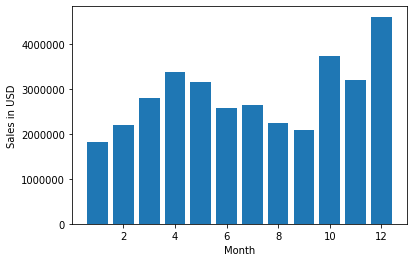

In [41]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months, sales_values['Sales'])



plt.ylabel('Sales in USD')
plt.xlabel('Month')

plt.show()



In [42]:
## what city had highest sales

In [45]:
all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])

In [46]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [53]:
all_data['State'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[2][1:3])

In [61]:
all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1] + ' ' + x.split(',')[2][1:3])


In [63]:
del all_data['State']

In [66]:
city_sales = all_data.groupby('City').sum()
city_sales

,Month,Sales
City,,
Atlanta GA,104794,2.795499e+06
Austin TX,69829,1.819582e+06
Boston MA,141112,3.661642e+06
Dallas TX,104620,2.767975e+06
Los Angeles CA,208325,5.452571e+06
New York City NY,175741,4.664317e+06
Portland ME,17144,4.497583e+05
Portland OR,70621,1.870732e+06
San Francisco CA,315520,8.262204e+06


In [68]:
cities = [city for city, df in all_data.groupby('City')]


([<matplotlib.axis.XTick at 0x284dc37b8d0>,
 <a list of 10 Text xticklabel objects>)

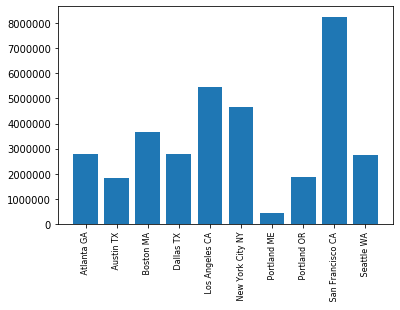

In [70]:
plt.bar(cities, city_sales['Sales'] )
plt.xticks(cities, rotation='vertical', size=8)

In [71]:
## at what time we should advertise to maximise prod sales

In [72]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [77]:
all_data['Hour'] = all_data['Order Date'].dt.hour

all_data['Minute'] = all_data['Order Date'].dt.minute

In [78]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


In [80]:
hours = [hour for hour, df in all_data.groupby('Hour')]
hours

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

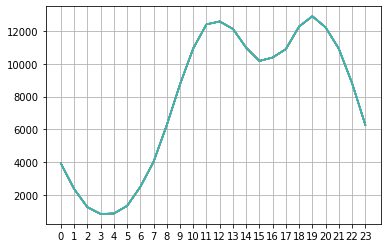

In [85]:
plt.plot(hours, all_data.groupby('Hour').count())
plt.xticks(hours)
plt.grid()

In [86]:

## what products after sold together ?

In [87]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

In [90]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [92]:
df = df[['Order ID', 'Grouped']].drop_duplicates()

In [95]:
from itertools import combinations
from collections import Counter
#count unique number of pairs

In [96]:
count = Counter()
for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

print(count)    

Counter({('iPhone', 'Lightning Charging Cable'): 1005, ('Google Phone', 'USB-C Charging Cable'): 987, ('iPhone', 'Wired Headphones'): 447, ('Google Phone', 'Wired Headphones'): 414, ('Vareebadd Phone', 'USB-C Charging Cable'): 361, ('iPhone', 'Apple Airpods Headphones'): 360, ('Google Phone', 'Bose SoundSport Headphones'): 220, ('USB-C Charging Cable', 'Wired Headphones'): 160, ('Vareebadd Phone', 'Wired Headphones'): 143, ('Lightning Charging Cable', 'Wired Headphones'): 92, ('Lightning Charging Cable', 'Apple Airpods Headphones'): 81, ('Vareebadd Phone', 'Bose SoundSport Headphones'): 80, ('USB-C Charging Cable', 'Bose SoundSport Headphones'): 77, ('Apple Airpods Headphones', 'Wired Headphones'): 69, ('Lightning Charging Cable', 'USB-C Charging Cable'): 58, ('Lightning Charging Cable', 'AA Batteries (4-pack)'): 55, ('Lightning Charging Cable', 'Lightning Charging Cable'): 54, ('Bose SoundSport Headphones', 'Wired Headphones'): 53, ('AA Batteries (4-pack)', 'Lightning Charging Cable')

In [97]:
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

In [98]:
# ans : most common is iPhone and Lightning Cable

In [99]:
#what product sold the most

In [100]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


In [105]:
product_group = all_data.groupby('Product')

In [104]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int32') 

In [107]:
quant = product_group.sum()['Quantity Ordered']

prod = [prod for prod, df in product_group]

Text(0.5, 0, 'Name of Product')

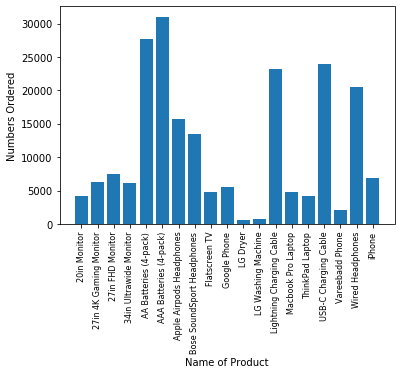

In [110]:
plt.bar(prod, quant)
plt.xticks(prod, rotation='vertical',size = 8 )
plt.ylabel('Numbers Ordered')
plt.xlabel('Name of Product')

In [116]:
all_data['Price Each'] = all_data['Price Each'].astype('float') 

In [117]:
prices = all_data.groupby('Product').mean()['Price Each']

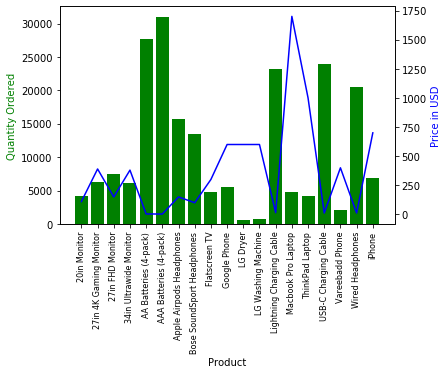

In [124]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.bar(prod, quant, color = 'g')

ax2.plot(prod, prices, 'b-')

ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered', color = 'g')
ax2.set_ylabel('Price in USD', color = 'b')
ax1.set_xticklabels(prod, rotation='vertical', size = 8)

plt.show()